# Bordes

En este notebook aprenderás a extraer bordes

In [1]:
# Paquetes necesarios

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

Esta imagen es de tipo: uint8 , con dimensiones: (512, 512, 3)


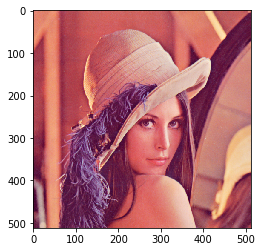

In [2]:
# Leer la imagen
img_color = cv2.imread('../02_geometria/Lenna.png')

# Desplegar información y graficar la imagen
print('Esta imagen es de tipo:', img_color.dtype, ', con dimensiones:', img_color.shape)
# graficar la imagen
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# Nota, opencv lee la imagen como BGR, asi que para graficarla es necesario antes convertirla a RGB 
# y que la entienda matplotlib

### Reducción de ruido. 

Debido a los sensores imperfectos o perturbaciones externas es necesario eliminar parte del ruido. Para ello, realizaremos un filtrado Gaussiano con un kernel de 5x5.



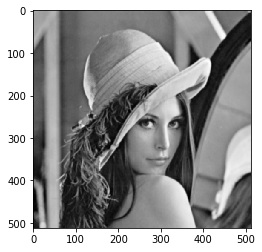

In [3]:
img_filtrada = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(img_filtrada, cmap='gray')

### Gradientes con filtro Sobel

In [4]:
# Crear un filtro tipo Sobel
# En esta función de opencv se crea el filtro y se realiza la convolución
sobelx = cv2.Sobel(img_filtrada,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_filtrada,cv2.CV_64F,0,1,ksize=5)


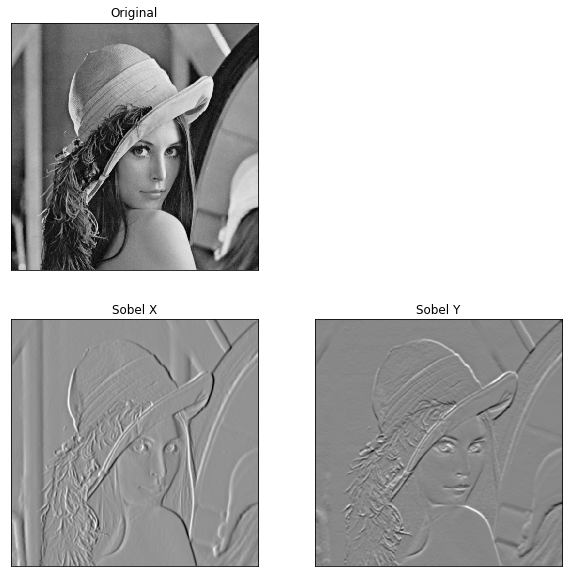

In [5]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
#plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
#plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
# Imprimir el valor menor
print(np.amin(sobelx))

-6374.0


# Combinar gradientes

Como pudimos ver después de realizar la extracción de bordes con el filtro Sobel obtuvimos dos imágenes que incluso tiene valores negativos. Por lo tanto, ahora aplicaremos el valor absoluto y combinaremos los bordes mediante una suma pesada. 

Queda de ejercicio calcular la magnitud del gradiente.

Para visualizar mejor los bordes realizaremos una umbralización.

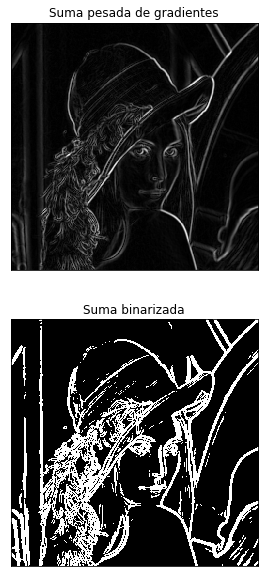

In [8]:
# Aplicar valores absolutos
sobelx = np.abs(sobelx)
sobely = np.abs(sobely)

# Combinar bordes mediante la suma pesada de los gradientes
bordes = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

# TODO: Ejercicio calcular la magnitud del gradiente
magnitud = None

# Para evitarnos problemas con opencv convertiremos a un formato conocido por opencv
bordes = bordes.astype('float32')

# TODO: convertir la magnitud

# umbralizamos la imagen de bordes
umbral = 450.0
ret, binaria = cv2.threshold(bordes, umbral, 500.0, cv2.THRESH_BINARY)

#TODO: binarizar la magnitud

# Graficar
plt.figure(figsize=(10,10))

plt.subplot(2,2,1),plt.imshow(bordes,cmap = 'gray')
plt.title('Suma pesada de gradientes'), plt.xticks([]), plt.yticks([])

#plt.subplot(2,2,2),plt.imshow(magnitud,cmap = 'gray')
#plt.title('Magnitud'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(binaria,cmap = 'gray')
plt.title('Suma binarizada'), plt.xticks([]), plt.yticks([])

#plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
#plt.title('Magnitud binarizada'), plt.xticks([]), plt.yticks([])

plt.show()


Si cambias el valor del umbral verás que los bordes en la imagen umbralizada cambian. Incluso podrás notar que los bordes que se generan son usualmente anchos. Para resolver este problema estudiaremos el siguiente método.

# Bordes con Canny

El algoritmo desarrollado por John Canny para la detección de bordes tiene gran popularidad debido a su simplicidad y eficacia para la detección de bordes. Al utilizarlo generamos bordes delgados y que tienen una mayor continuidad en los en los gradientes. A continuación entraremos en más detalles de los pasos que realiza el algoritmo.

1. Reducir el ruido.
2. Calcular la magnitud del gradiente
3. Eliminar el ancho de los bordes
4. Umbralizado por histéresis



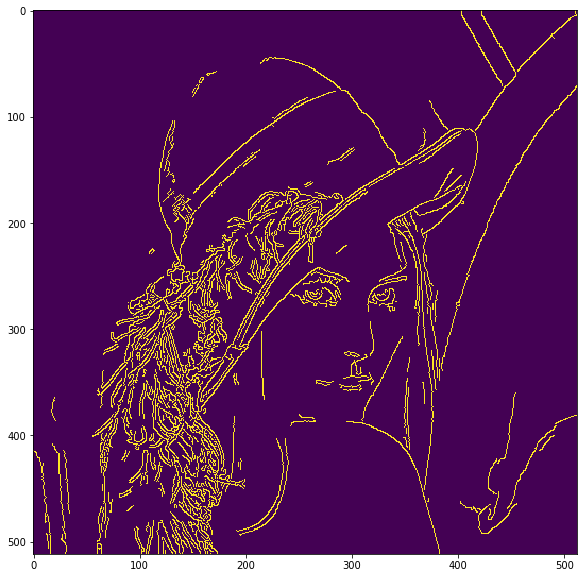

In [9]:
umbral_menor = 100
umbral_mayor = 200

#TODO: cambia los valores de los umbrales y observa el resultado
edges = cv2.Canny(img, umbral_menor, umbral_mayor)

plt.figure(figsize=(10,10))
plt.imshow(edges)
plt.show()